<a href="https://colab.research.google.com/github/AshmithaMB/ML-hands-on/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* The data file train.csv contains gray-scale images of hand-drawn digits, from zero through nine.

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

* The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

* Dataset Link - https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
digit = pd.read_csv("train.csv")

In [ ]:
print(digit.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783  
0       0.0       0.0       0.

* Saving the lables into the variable "l"

In [ ]:
l = digit['label']

* Dropping the label feature from digit 
* Storing the pixel data in d

In [ ]:
d = digit.drop("label", axis = 1)

In [ ]:
d.shape

(17784, 784)

In [ ]:
l.shape

(17784,)

* Printing label value with respect to its index

In [ ]:
indx = 1
print(l[indx])

0


* To plot above label,

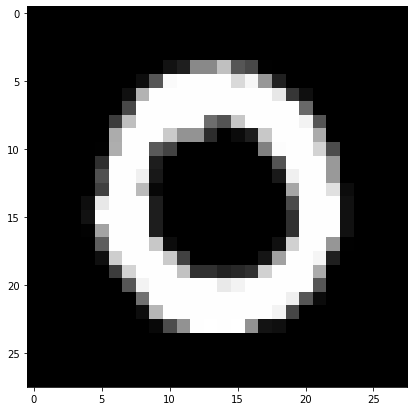

In [ ]:
plt.figure(figsize = (7, 7))

# to plot the above label which has the above mentioned index,
# as it returns a 1D array, for the convineance of plotting,
# reshaping it into 2D

grid_data = d.loc[indx].values.reshape(28,28)

plt.imshow(grid_data, interpolation = 'none', cmap = 'gray');


2D Visualization with PCA

In [ ]:
labels = l.head(15000)
data = d.head(15000)
print("The shape of the data = ",data.shape)

The shape of the data =  (15000, 784)


Data Preprocessing
* Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standardized_data = StandardScaler().fit_transform(data)

In [ ]:
standardized_data.shape

(15000, 784)

Finding the Co-Variance Matrix
* A * A^T

* Positive Co-Variance = Both the dimensions are directly proportional to each other (if one increases the other increases)
* Negative Co-Variance = Both the dimensions are indirectly proportional to each other (if one increases the other decreases)
* Zero Co-Variance = Two dimensions are independent of each other

In [ ]:
sample_data = standardized_data

* Matrix multiplication using NumPy to find Co-Variance Matrix

In [ ]:
CoVarianceMatrix = np.matmul(sample_data.T, sample_data)

In [ ]:
CoVarianceMatrix.shape

(784, 784)

Computing EigenVectors and EigenValues
* The EigenVectors (Principal Components) and EigenValues of a CoVariance Matrix represent the "core" of a PCA
* The EigenVectors determine the directions of the new feature space
* The EigenValues explain the variance of the data along the new feature axes (magnitude)
* These both together give the principal components and a vector that we can use to project high-dimensional inputs to the lower-dimentional subspace.

In [ ]:
from scipy.linalg import eigh

In [ ]:
values, vectors = eigh(CoVarianceMatrix, eigvals = (782, 783))
vectors.shape

(784, 2)

* 'eigvals' is defined (low value to high value)
* eigh function will return eigen values in ascending order
* This code will generate only top 2 (782, 783) eigen values.

In [ ]:
vectors = vectors.T

In [ ]:
new_coordinates = np.matmul(vectors, sample_data.T)

In [ ]:
new_coordinates.shape

(2, 15000)